In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
x_src_path = '../../Dataset/mixed_text_assignment.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [35]:
data = pd.read_json(x_src_path)

In [36]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [37]:
texts = data.iloc[:, :].astype(str).values.tolist()

texts = [[element if element != 'None' else '' for element in sublist] for sublist in texts]

In [38]:
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>") 
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_len = max([len(seq) for seq in sequences])
data_vectorized = pad_sequences(sequences, maxlen=max_sequence_len)

In [39]:
X_N = data_vectorized
y = plagiarised_array

In [40]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [41]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [98]:
from xgboost import XGBClassifier


numbP = XGBClassifier()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

from sklearn.metrics import accuracy_score, classification_report
y_pred = numbP.predict(X_N_test)
accuracy = accuracy_score(y_N_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred))

Training data score: 1.0
Test data score: 0.9629629629629629
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.80      0.89         5

    accuracy                           0.96        27
   macro avg       0.98      0.90      0.93        27
weighted avg       0.96      0.96      0.96        27



In [43]:
from sklearn.tree import DecisionTreeClassifier

numbP = DecisionTreeClassifier()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

from sklearn.metrics import accuracy_score, classification_report
y_pred = numbP.predict(X_N_test)
accuracy = accuracy_score(y_N_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred))

Training data score: 1.0
Test data score: 0.8518518518518519
Accuracy: 0.8518518518518519
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.57      0.80      0.67         5

    accuracy                           0.85        27
   macro avg       0.76      0.83      0.79        27
weighted avg       0.88      0.85      0.86        27



In [44]:
from sklearn.linear_model import LogisticRegression

numbP = LogisticRegression(max_iter=100000)
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

from sklearn.metrics import accuracy_score, classification_report
y_pred = numbP.predict(X_N_test)
accuracy = accuracy_score(y_N_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred))

Training data score: 1.0
Test data score: 0.7407407407407407
Accuracy: 0.7407407407407407
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.38      0.60      0.46         5

    accuracy                           0.74        27
   macro avg       0.63      0.69      0.65        27
weighted avg       0.80      0.74      0.76        27



In [92]:
NPH = 32
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=10, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/10
4/4 [==============================] - 1s 45ms/step - loss: 4.0385 - accuracy: 0.7264 - val_loss: 3.6279 - val_accuracy: 0.8148
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 2.8995 - accuracy: 0.8491 - val_loss: 0.9801 - val_accuracy: 0.8148
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 1.1544 - accuracy: 0.8491 - val_loss: 1.0476 - val_accuracy: 0.6296
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.5180 - accuracy: 0.9151 - val_loss: 0.3547 - val_accuracy: 0.8889
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.2127 - accuracy: 0.9245 - val_loss: 0.5926 - val_accuracy: 0.8519
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 0.1407 - accuracy: 0.9528 - val_loss: 0.2619 - val_accuracy: 0.8889
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 0.0783 - accuracy: 0.9717 - val_loss: 0.3613 - val_accuracy: 0.8519
Epoch 8/10
4/4 [===========

In [93]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_N_test, y_pred_numb_binary_flat)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_N_test, y_pred_numb_binary_flat))

Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.40      0.57         5

    accuracy                           0.89        27
   macro avg       0.94      0.70      0.75        27
weighted avg       0.90      0.89      0.87        27



In [47]:
# numb_model.summary()
# numb_model.save("good_model.h5")

In [94]:
for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
    print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 1
Number: 0, Perceptron: 0 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0


In [95]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 23ms/step - loss: 0.3184 - accuracy: 0.8889
0.8888888955116272


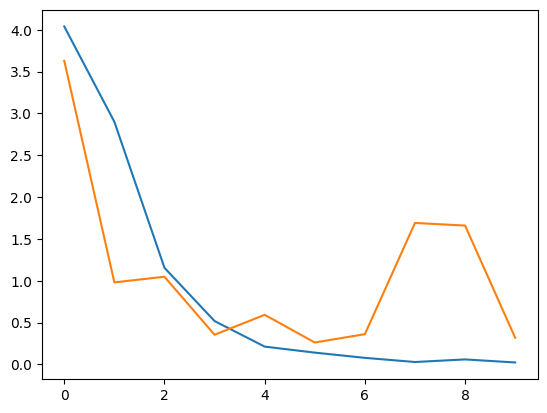

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

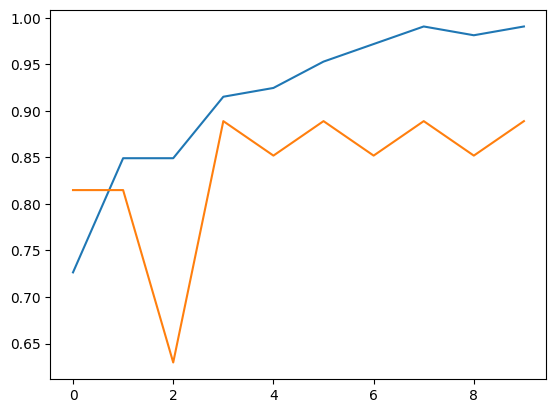

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])